# Horizontal disparity maps from stereo vision

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(path):
  image = cv2.imread(path)
  return image

In [3]:
L_image1 = cv2.imread('/content/l1.png')
L_image2 = cv2.imread('/content/l2.png')
L_image3 = cv2.imread('/content/l3.png')
R_image1 = cv2.imread('/content/r1.png')
R_image2 = cv2.imread('/content/r2.png')
R_image3 = cv2.imread('/content/r3.png')

## Block matching

Here we calculate the disparity map between two stereo images using block matching. The goal is to compute the pixel shifts (disparities) that represent depth information in the scene. For each block in the left image, it searches for the best matching block in the right image using two possible cost metrics: **Sum of Absolute Differences (SAD)** and **Sum of Squared Differences (SSD)**. The horizontal shift between the matching blocks is recorded as the disparity, and a disparity map is generated for depth visualization.

The `calculate_disparity` function computes the disparity map between two stereo images using block matching:

1. **Convert to Grayscale**: Converts the left and right images to grayscale.
2. **Padding**: Adds padding to handle borders.
3. **Block Matching**: For each pixel, it extracts a block and finds the best matching block in the right image using either SAD or SSD.
4. **Disparity Calculation**: The disparity is computed as the horizontal shift between matching blocks and stored in the disparity map.
5. **Normalization**: Normalizes the disparity map for visualization.

The `compare_windows` function compares blocks from the left and right images, calculating the matching cost and returning the best match.

In [4]:
#function to calculate the Sum of Absolute Differences
def calc_SAD (values_1,values_2):
  if values_1.shape != values_2.shape:
    return -1
  else:
    return np.sum(abs(values_1-values_2))

#function to calculate the sum of squared differences
def calc_SSD(values_1, values_2):
    if values_1.shape != values_2.shape:
        return -1
    else:
        return np.sum((values_1 - values_2) ** 2)

In [5]:
def compare_windows(row,col,left_block,right_image,block_size,search_block_size,use_SAD):
  half_block = block_size // 2
  y_min = max(half_block,col-search_block_size)
  y_max = min(right_image.shape[1]-half_block,col+search_block_size)

  #y_min = half_block
  #y_max = col

  min_cost = float('inf')
  min_index = None
  for y in range(y_min,y_max):
    right_block = right_image[row - half_block : row + half_block+1 , y-half_block : y+half_block+1 ]
    if use_SAD:
      cost = calc_SAD(left_block,right_block)
    else:
      cost = calc_SSD(left_block,right_block)

    if cost < min_cost:
      min_cost = cost
      min_index = y
  return min_index

def calculate_disparity(left_image,right_image,block_size,search_block_size,use_SAD):
  #converting to gray scale
  left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
  right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)
  #initialize the disparity map
  disparity_map = np.zeros_like(left_image, dtype=np.float32)
  half_block = block_size // 2
  #padding the images
  left_image = cv2.copyMakeBorder(left_image, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
  right_image = cv2.copyMakeBorder(right_image, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)

  # Get image dimensions
  h, w = left_image.shape

  for y in range (half_block , h-half_block):
    for x in range (half_block , w - half_block):
      left_block = left_image[y-half_block : y+half_block+1 , x-half_block : x+half_block+1]
      min_index = compare_windows(y,x,left_block,right_image,block_size,search_block_size,use_SAD)
      if min_index is not None:
        disparity_map[y-half_block,x-half_block] = abs(min_index- x)

  #normalizing the disparity map for visualization
  disparity_map = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
  return disparity_map.astype(np.uint8)

In [6]:
def plot_diparity_maps(dis_map_1,dis_map_5,dis_map_9,title):
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  # Add a title for the entire figure
  fig.suptitle(title, fontsize=16)
  # Display the first disparity map
  axes[0].imshow(dis_map_1, cmap='grey')
  axes[0].set_title('Window size = 1')
  axes[0].axis('off')  # Turn off axis

  # Display the second disparity map
  axes[1].imshow(dis_map_5, cmap='grey')
  axes[1].set_title('Window size = 5')
  axes[1].axis('off')  # Turn off axis

  # Display the third disparity map
  axes[2].imshow(dis_map_9, cmap='grey')
  axes[2].set_title('Window size = 9')
  axes[2].axis('off')  # Turn off axis

  # Show the plots
  plt.tight_layout()
  plt.show()

Getting the disparity maps for different window sizes for the first image

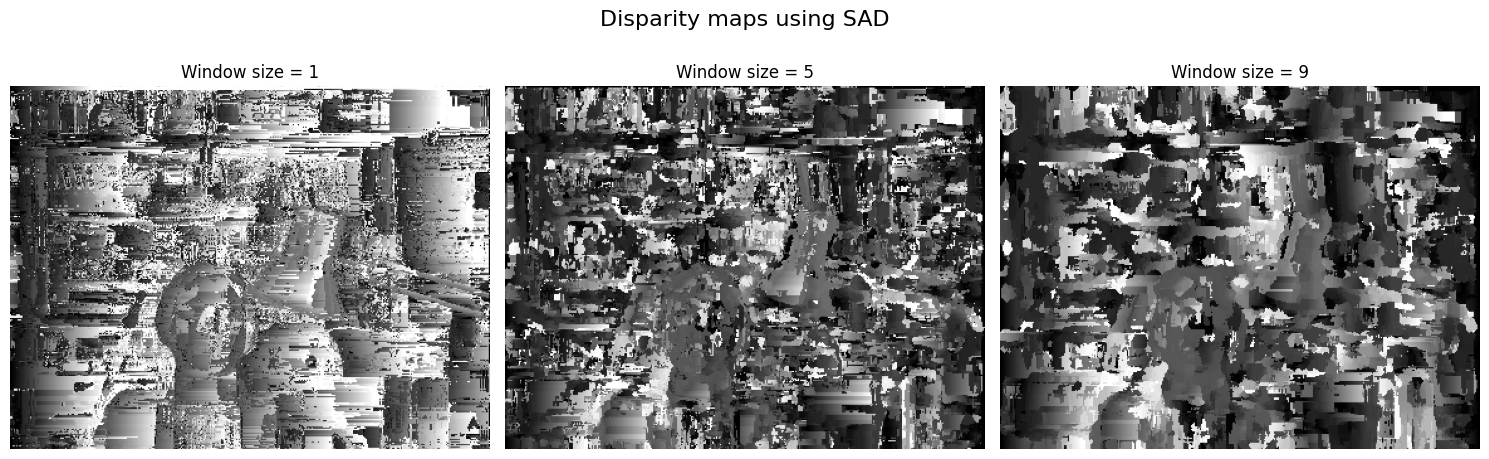

In [7]:
disparity_map_1 = calculate_disparity(L_image1,R_image1,1,64,True)
disparity_map_5 = calculate_disparity(L_image1,R_image1,5,64,True)
disparity_map_9 = calculate_disparity(L_image1,R_image1,9,64,True)
plot_diparity_maps(disparity_map_1,disparity_map_5,disparity_map_9,"Disparity maps using SAD")

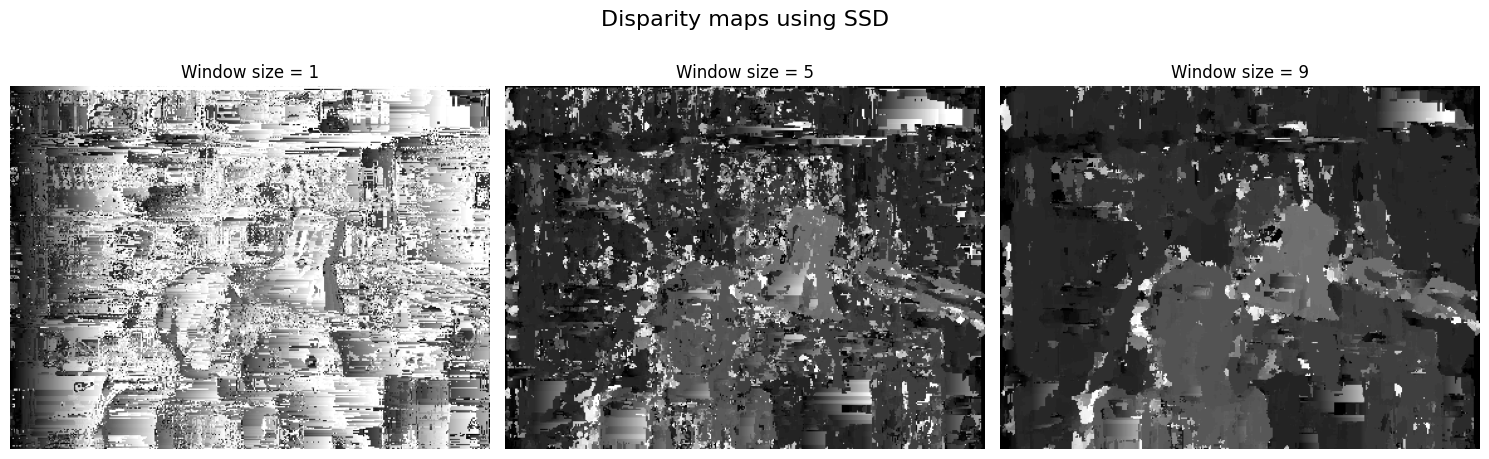

In [8]:
disparity_map_1 = calculate_disparity(L_image1,R_image1,1,64,False)
disparity_map_5 = calculate_disparity(L_image1,R_image1,5,64,False)
disparity_map_9 = calculate_disparity(L_image1,R_image1,9,64,False)
plot_diparity_maps(disparity_map_1,disparity_map_5,disparity_map_9,"Disparity maps using SSD")

Getting the disparity maps for different window sizes for the second image

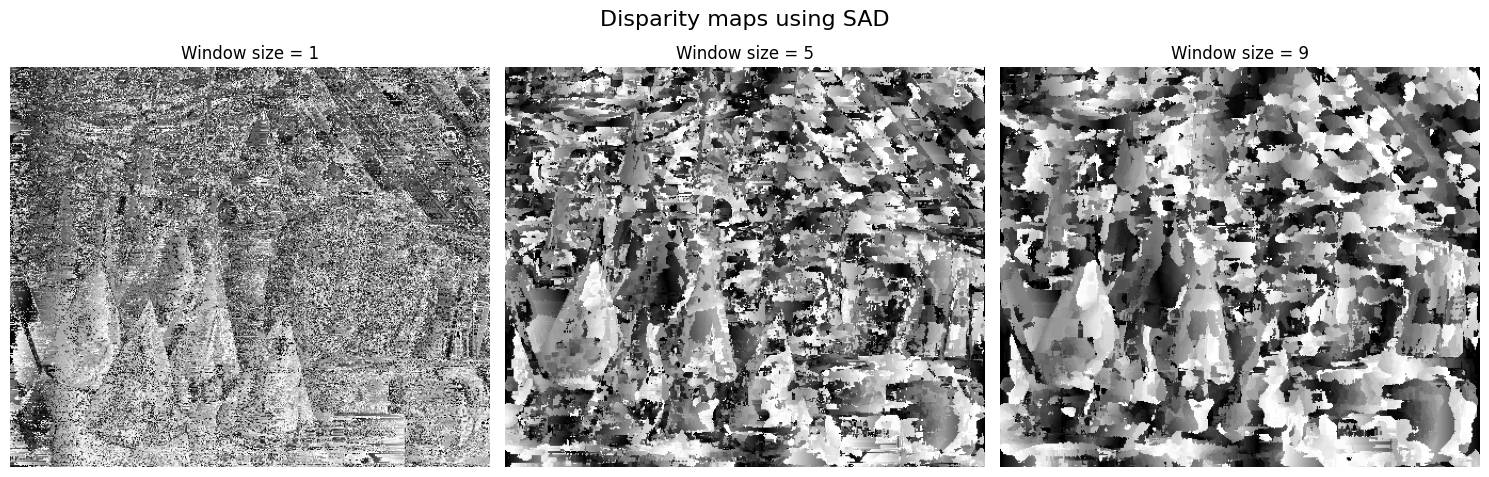

In [9]:
disparity_map_1 = calculate_disparity(L_image2,R_image2,1,64,True)
disparity_map_5 = calculate_disparity(L_image2,R_image2,5,64,True)
disparity_map_9 = calculate_disparity(L_image2,R_image2,9,64,True)
plot_diparity_maps(disparity_map_1,disparity_map_5,disparity_map_9,"Disparity maps using SAD")

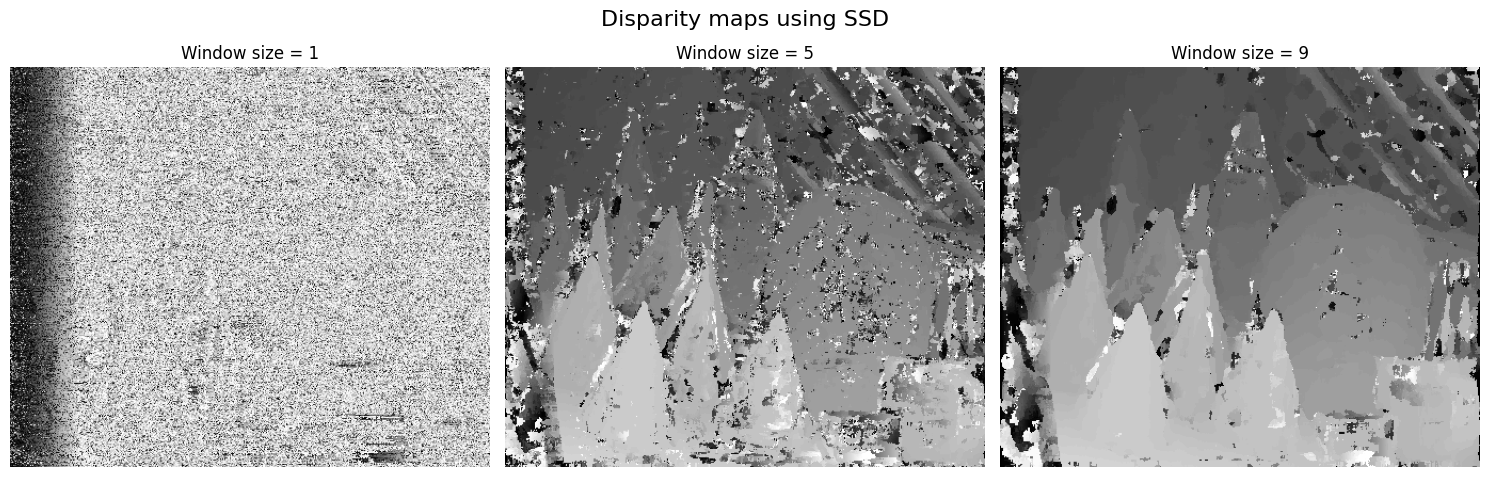

In [10]:
disparity_map_1 = calculate_disparity(L_image2,R_image2,1,64,False)
disparity_map_5 = calculate_disparity(L_image2,R_image2,5,64,False)
disparity_map_9 = calculate_disparity(L_image2,R_image2,9,64,False)
plot_diparity_maps(disparity_map_1,disparity_map_5,disparity_map_9,"Disparity maps using SSD")

Getting the disparity maps for different window sizes for the third image

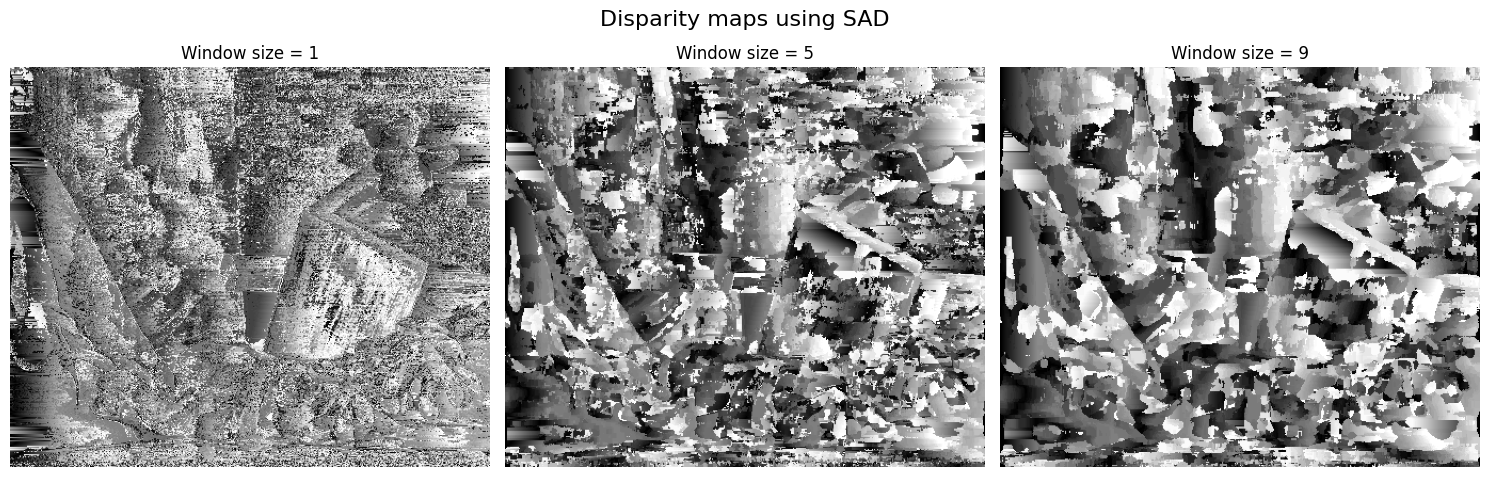

In [11]:
disparity_map_1 = calculate_disparity(L_image3,R_image3,1,64,True)
disparity_map_5 = calculate_disparity(L_image3,R_image3,5,64,True)
disparity_map_9 = calculate_disparity(L_image3,R_image3,9,64,True)
plot_diparity_maps(disparity_map_1,disparity_map_5,disparity_map_9,"Disparity maps using SAD")

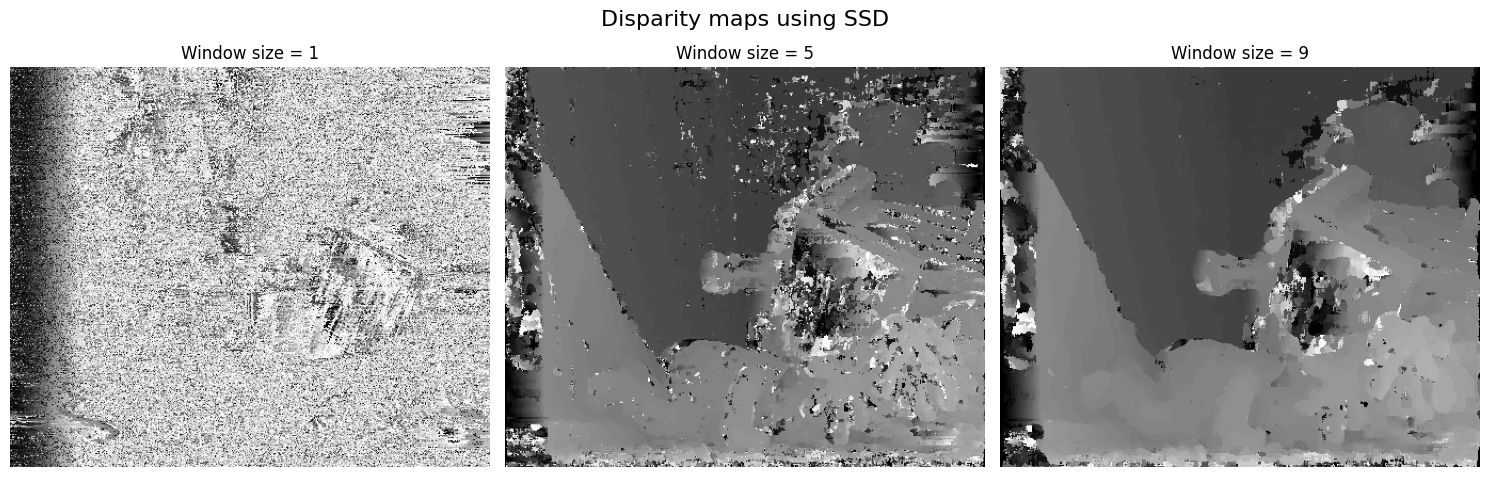

In [12]:
disparity_map_1 = calculate_disparity(L_image3,R_image3,1,64,False)
disparity_map_5 = calculate_disparity(L_image3,R_image3,5,64,False)
disparity_map_9 = calculate_disparity(L_image3,R_image3,9,64,False)
plot_diparity_maps(disparity_map_1,disparity_map_5,disparity_map_9,"Disparity maps using SSD")

## Dynamic programming

1. **`compute_cost_matrix(left_row, right_row)`**  
   - Computes a cost matrix using dynamic programming for aligning two rows (one from each image).  
   - The cost considers pixel intensity differences and penalties for skips or mismatches.

2. **`backtrack_cost_matrix(cost_matrix, left_row, right_row)`**  
   - Backtracks through the cost matrix to determine the best alignment path.  
   - Calculates the disparity (pixel shift) for each position in the left row.

3. **`calculate_disparity_DP(left_image, right_image)`**  
   - Converts input stereo images to grayscale.  
   - Computes the disparity map row by row using the above functions.  
   - Normalizes the resulting disparity map for visualization.

In [13]:
def compute_cost_matrix (left_row,right_row):
  n =len(left_row)
  m = len(right_row)

  cost_matrix = np.zeros((n,m),dtype=float)

  for i in range(1, n):
    cost_matrix[i, 0] = cost_matrix[i - 1, 0] + 1.0

  for j in range(1, m):
      cost_matrix[0, j] = cost_matrix[0, j - 1] + 1.0

  cost_matrix[0,0] = ((left_row[0]-right_row[0]) ** 2) / 4

  for i in range(1,n):
    for j in range(1,m):
      match_cost = ((left_row[i]-right_row[j]) ** 2) / 4
      cost_matrix[i,j] = min (cost_matrix[i-1][j-1] + match_cost,
                              cost_matrix[i-1][j] + 1.0,
                              cost_matrix[i,j-1] + 1.0)

  return cost_matrix

In [14]:
def backtrack_cost_matrix(cost_matrix,left_row,right_row):
  i = len(left_row) - 1
  j = len(right_row) - 1
  disparity = np.zeros(i+1,dtype=np.float32)
  while i >= 0 and j >= 0:
    match_cost = ((left_row[i]-right_row[j]) ** 2) / 4
    min_index = np.argmin([cost_matrix[i-1,j-1]+match_cost,cost_matrix[i-1,j]+1.0,cost_matrix[i,j-1]+1.0])
    if min_index == 0:
      disparity[i] = abs(j-i)
      i -= 1
      j -= 1
    elif min_index == 1:
      i -= 1
    else:
      j -= 1
  return disparity

In [15]:
def calculate_disparity_DP(left_image,right_image):
  #converting to gray scale
  left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
  right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)
  #initialize the disparity map
  disparity_map = np.zeros_like(left_image, dtype=np.float32)
  # Get image dimensions
  h , w = left_image.shape

  for y in range (h):
    left_row = left_image[y,:]
    right_row = right_image[y,:]
    cost_matrix = compute_cost_matrix(left_row,right_row)
    disparity_map[y,:] = backtrack_cost_matrix(cost_matrix,left_row,right_row)


  disparity_map = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
  return disparity_map.astype(np.uint8)

Calculating disparity map of first image

<ipython-input-13-098a78c2a024>:17: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i]-right_row[j]) ** 2) / 4
<ipython-input-14-e151909ab79f>:6: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i]-right_row[j]) ** 2) / 4
<ipython-input-13-098a78c2a024>:13: RuntimeWarning: overflow encountered in scalar subtract
  cost_matrix[0,0] = ((left_row[0]-right_row[0]) ** 2) / 4


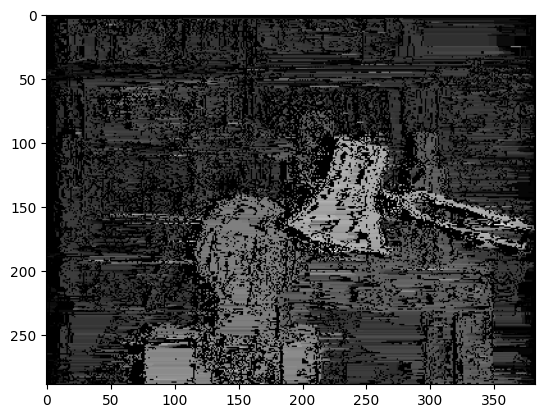

In [16]:
disparity_map_DP = calculate_disparity_DP(L_image1,R_image1)
plt.imshow(disparity_map_DP, cmap='grey')
plt.show()

Calculating disparity map of second image

<ipython-input-13-098a78c2a024>:13: RuntimeWarning: overflow encountered in scalar subtract
  cost_matrix[0,0] = ((left_row[0]-right_row[0]) ** 2) / 4
<ipython-input-13-098a78c2a024>:17: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i]-right_row[j]) ** 2) / 4
<ipython-input-14-e151909ab79f>:6: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i]-right_row[j]) ** 2) / 4


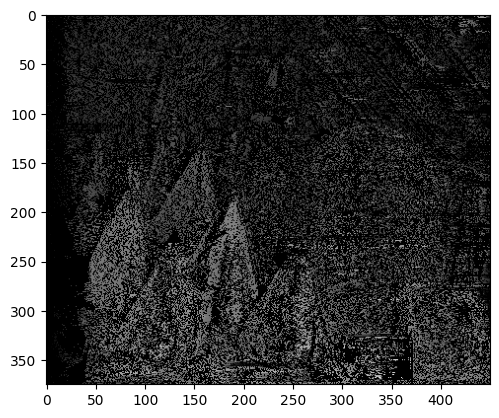

In [17]:
disparity_map_DP = calculate_disparity_DP(L_image2,R_image2)
plt.imshow(disparity_map_DP, cmap='grey')
plt.show()

Calculating disparity map of third image

<ipython-input-13-098a78c2a024>:13: RuntimeWarning: overflow encountered in scalar subtract
  cost_matrix[0,0] = ((left_row[0]-right_row[0]) ** 2) / 4
<ipython-input-13-098a78c2a024>:17: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i]-right_row[j]) ** 2) / 4
<ipython-input-14-e151909ab79f>:6: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i]-right_row[j]) ** 2) / 4


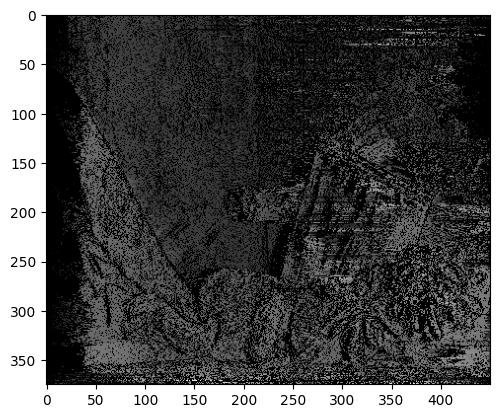

In [18]:
disparity_map_DP = calculate_disparity_DP(L_image3,R_image3)
plt.imshow(disparity_map_DP, cmap='grey')
plt.show()

### Computing the disparity maps using dynamic programming with allignment 


In [ ]:
def compute_cost_matrix(left_row, right_row):
    n = len(left_row)
    m = len(right_row)

    cost_matrix = np.zeros((n, m), dtype=float)

    for i in range(1, n):
        cost_matrix[i, 0] = cost_matrix[i - 1, 0] + 1.0

    for j in range(1, m):
        cost_matrix[0, j] = cost_matrix[0, j - 1] + 1.0

    cost_matrix[0, 0] = ((left_row[0] - right_row[0]) ** 2) / 4

    for i in range(1, n):
        for j in range(1, m):
            match_cost = ((left_row[i] - right_row[j]) ** 2) / 4
            cost_matrix[i, j] = min(
                cost_matrix[i - 1][j - 1] + match_cost,
                cost_matrix[i - 1][j] + 1.0,
                cost_matrix[i][j - 1] + 1.0
            )

    return cost_matrix

In [24]:
def backtrack_cost_matrix(cost_matrix, left_row, right_row):
    i = len(left_row) - 1
    j = len(right_row) - 1
    disparity = np.zeros(i + 1, dtype=np.float32)
    alignments = []

    while i >= 0 and j >= 0:
        alignments.append([i, j])
        match_cost = ((left_row[i] - right_row[j]) ** 2) / 4
        min_index = np.argmin([
            cost_matrix[i - 1, j - 1] + match_cost,
            cost_matrix[i - 1, j] + 1.0,
            cost_matrix[i, j - 1] + 1.0
        ])
        if min_index == 0:
            disparity[i] = abs(j - i)
            i -= 1
            j -= 1
        elif min_index == 1:
            i -= 1
        else:
            j -= 1

    while i >= 0:
        alignments.append([i, 0])
        i -= 1

    while j >= 0:
        alignments.append([0, j])
        j -= 1

    return disparity, alignments

In [25]:

def calculate_disparity_DP(left_image, right_image):
    left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
    right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

    disparity_map = np.zeros_like(left_image, dtype=np.float32)
    alignments_found = []

    h, w = left_image.shape

    for y in range(h):
        left_row = left_image[y, :]
        right_row = right_image[y, :]
        cost_matrix = compute_cost_matrix(left_row, right_row)
        disparity_map[y, :], alignments = backtrack_cost_matrix(cost_matrix, left_row, right_row)
        alignments_found.append(alignments)

    disparity_map = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return disparity_map.astype(np.uint8), alignments_found




In [26]:
def draw_alignment_with_pixels(alignments, img_left, img_right, line_idx):
    img_left_normalized = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB) / 255.0
    img_right_normalized = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB) / 255.0

    selected_alignments = alignments[line_idx]
    x_values, y_values = zip(*selected_alignments)

    plt.plot(x_values, y_values, linestyle='-', linewidth=0.5, color='red')

    img_left_line = img_left_normalized[line_idx]
    img_right_line = img_right_normalized[line_idx]

    width = len(img_left_line)

    plt.scatter(np.arange(width), np.zeros(width) - 15, c=img_left_line, marker='s')

    plt.scatter(np.zeros(width) - 15, np.arange(width), c=img_right_line, marker='s')

    plt.gca().invert_yaxis()

    plt.xlabel(f'Line {line_idx} of right picture')
    plt.ylabel(f'Line {line_idx} of left picture')

    plt.show()

<ipython-input-23-b02e52ed171a>:17: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i] - right_row[j]) ** 2) / 4
<ipython-input-24-68f2db2af8f7>:9: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i] - right_row[j]) ** 2) / 4
<ipython-input-23-b02e52ed171a>:13: RuntimeWarning: overflow encountered in scalar subtract
  cost_matrix[0, 0] = ((left_row[0] - right_row[0]) ** 2) / 4


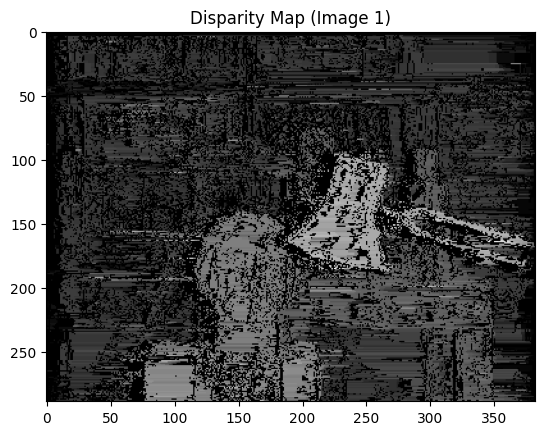

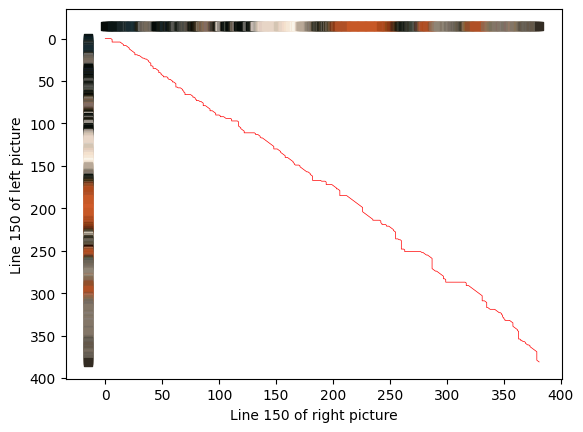

In [27]:
# Calculate and plot disparity maps and alignments
disparity_map_DP, alignments = calculate_disparity_DP(L_image1, R_image1)
plt.imshow(disparity_map_DP, cmap='gray')
plt.title("Disparity Map (Image 1)")
plt.show()
# Draw alignment for a specific line
draw_alignment_with_pixels(alignments, L_image1, R_image1, 150)

<ipython-input-23-b02e52ed171a>:13: RuntimeWarning: overflow encountered in scalar subtract
  cost_matrix[0, 0] = ((left_row[0] - right_row[0]) ** 2) / 4
<ipython-input-23-b02e52ed171a>:17: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i] - right_row[j]) ** 2) / 4
<ipython-input-24-68f2db2af8f7>:9: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i] - right_row[j]) ** 2) / 4


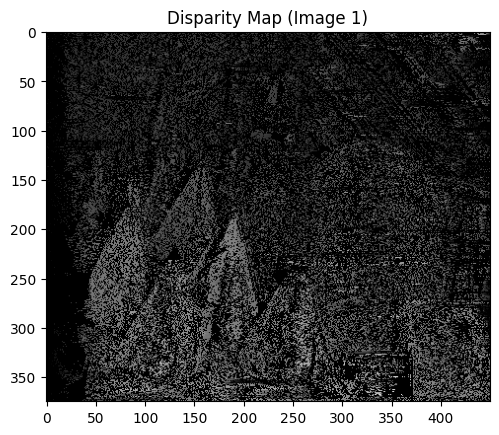

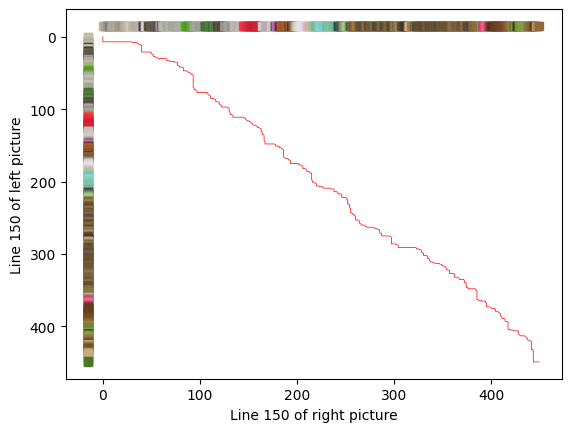

In [28]:
# Calculate and plot disparity maps and alignments
disparity_map_DP, alignments = calculate_disparity_DP(L_image2, R_image2)
plt.imshow(disparity_map_DP, cmap='gray')
plt.title("Disparity Map (Image 1)")
plt.show()
# Draw alignment for a specific line
draw_alignment_with_pixels(alignments, L_image2, R_image2, 150)

<ipython-input-23-b02e52ed171a>:13: RuntimeWarning: overflow encountered in scalar subtract
  cost_matrix[0, 0] = ((left_row[0] - right_row[0]) ** 2) / 4
<ipython-input-23-b02e52ed171a>:17: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i] - right_row[j]) ** 2) / 4
<ipython-input-24-68f2db2af8f7>:9: RuntimeWarning: overflow encountered in scalar subtract
  match_cost = ((left_row[i] - right_row[j]) ** 2) / 4


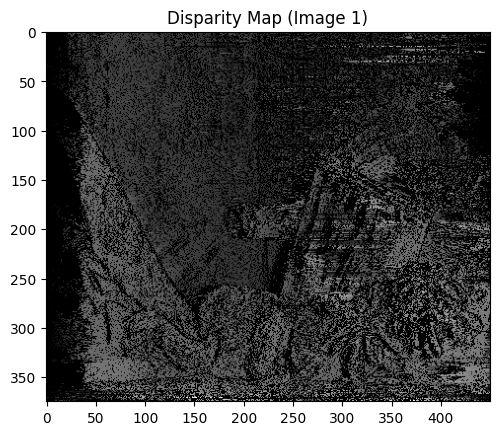

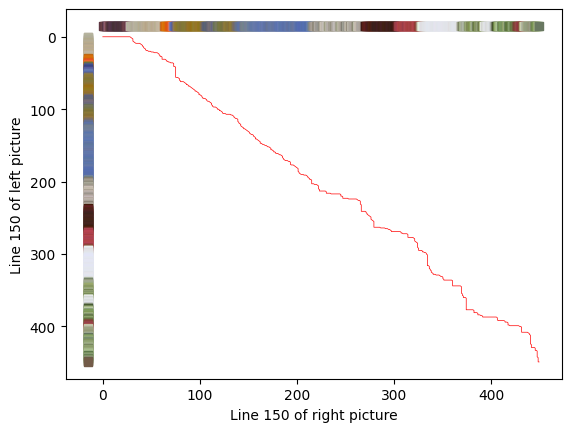

In [29]:
# Calculate and plot disparity maps and alignments
disparity_map_DP, alignments = calculate_disparity_DP(L_image3, R_image3)
plt.imshow(disparity_map_DP, cmap='gray')
plt.title("Disparity Map (Image 1)")
plt.show()
# Draw alignment for a specific line
draw_alignment_with_pixels(alignments, L_image3, R_image3, 150)